# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [26]:
#The objective is to develop a data-driven model to establish correlations and quantify the relationships between car attributes—such as year, manufacturer, model, condition, mileage, and other features—and the dependent variable, price.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [66]:
#Load the dataset
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [67]:
# Let's check data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [68]:
# Let's check the dimensions of the dataframe
df.shape

(426880, 18)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [69]:
# Let's check the null values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [70]:
# Check for duplicate rows
df.duplicated().sum()

0

In [71]:
#count the number of rows with a price of 0
zero_price_count = (df['price'] == 0).sum()
print(f'Number of items with price 0: {zero_price_count}')
# calculate the percentage of rows with price == 0
zero_price_percentage = (df['price'] == 0).sum() / len(df) * 100
print(f'Percentage of items with price 0: {zero_price_percentage:.2f}%')

Number of items with price 0: 32895
Percentage of items with price 0: 7.71%


In [72]:
#Consider only rows with price greater than zero
df_clean = df[df['price'] != 0]
# Convert the 'price' column to integer
df_clean.loc[:, 'price'] = df_clean['price'].astype(int)
df_clean.shape

(393985, 18)

In [73]:
# calculate 
df_clean['year'].describe()

count    392812.000000
mean       2011.006115
std           9.630905
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

In [74]:
#Find unique values for condition and title_status
df_clean.condition.unique()
# Replace NaN values in the 'condition' column with a default value, e.g., 'Unknown'
df_clean.loc[:, 'condition'] = df_clean['condition'].fillna('Unknown')
# Verify the replacement
print(df_clean['condition'].isnull().sum())  # Should return 0 (no NaN values)

0


In [75]:
#Find unique values title_status and replace NaN values
df_clean.title_status.unique()
# Replace NaN values in the 'condition' column with a default value, e.g., 'Unknown'
df_clean.loc[:,'title_status'] = df_clean['title_status'].fillna('Unknown')
# Verify the replacement
print(df_clean['title_status'].isnull().sum())  # Should return 0 (no NaN values)

0


In [76]:
# Check for basic statistics
print(df_clean['price'].describe())
# Check for unique values
print(df_clean['price'].unique())
# Check the data type
print(df_clean['price'].dtype)
# Count non-zero values
print(f"Non-zero values: {(df_clean['price'] != 0).sum()}")

count    3.939850e+05
mean     8.147763e+04
std      1.268064e+07
min      1.000000e+00
25%      7.000000e+03
50%      1.500000e+04
75%      2.759000e+04
max      3.736929e+09
Name: price, dtype: float64
[ 6000 11900 21000 ...  6328 19853 17873]
int64
Non-zero values: 393985


In [80]:
# Replace NaN values in the 'year' column with the mean value
mean_year = df_clean['year'].mean(skipna=True)  # Calculate the mean, skipping NaN values
df_clean.loc[:,'year'] = df_clean['year'].fillna(mean_year)
df_clean['year'] = df_clean['year'].astype(int)
# Drop NanN values in odometer and year
df_clean = df_clean.dropna(subset=['odometer'])
df_clean['odometer'] = df_clean['odometer'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391695 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            391695 non-null  int64 
 1   region        391695 non-null  object
 2   price         391695 non-null  int64 
 3   year          391695 non-null  int64 
 4   manufacturer  375623 non-null  object
 5   model         387062 non-null  object
 6   condition     391695 non-null  object
 7   cylinders     232516 non-null  object
 8   fuel          389372 non-null  object
 9   odometer      391695 non-null  int64 
 10  title_status  391695 non-null  object
 11  transmission  390175 non-null  object
 12  VIN           240684 non-null  object
 13  drive         391695 non-null  object
 14  size          110585 non-null  object
 15  type          306247 non-null  object
 16  paint_color   275588 non-null  object
 17  state         391695 non-null  object
dtypes: int64(4), object(14)
memo

In [81]:
df_clean['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [82]:
# Replace remaining NaN in 'drive' with the majority value after mapping
majority_drive = df_clean['drive'].mode()[0]
df_clean.loc[:,'drive'] = df_clean['drive'].fillna(majority_drive)
# Verify the result
print(df_clean['drive'].unique())

['4wd' 'rwd' 'fwd']


In [83]:
#Print outliers to understand
price_25 = df_clean['price'].quantile(0.25)
price_75 = df_clean['price'].quantile(0.75)
price_iqr = price_75 - price_25
print(price_75, price_25, price_iqr)
price_upperlimit = price_75 + 1.5 * price_iqr
price_lowerlimit = price_75 - 1.5 * price_iqr
print(price_upperlimit, price_lowerlimit)

27590.0 7000.0 20590.0
58475.0 -3295.0


In [84]:
#print outliners
print("Outliers - ",len(df_clean)-len(df_clean[(df_clean['price'] < price_upperlimit) & (df_clean['price'] > price_lowerlimit)]))

Outliers -  7701


<Axes: >

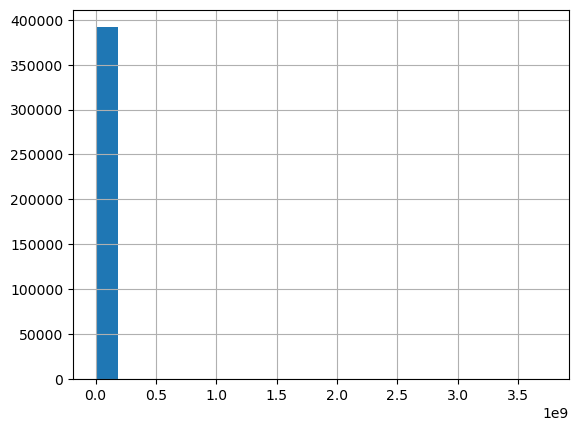

In [85]:
df_clean['price'].hist(bins = 20)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [86]:
# Replace NaN values in the 'year' column with the mean value
mean_year = df_clean['year'].mean(skipna=True)  # Calculate the mean, skipping NaN values
df_clean.loc[:,'year'] = df_clean['year'].fillna(mean_year)
df_clean.loc[:,'year'] = df_clean['year'].astype(int)
df_clean = df_clean.dropna(subset=['odometer'])
df_clean.loc[:,'odometer'] = df_clean['odometer'].astype(int)

In [87]:
conditon_ml = pd.get_dummies(df_clean['condition'], prefix='condition').astype(int)
title_status_ml = pd.get_dummies(df_clean['title_status'], prefix='title_status').astype(int)
df_clean = pd.concat([df_clean,conditon_ml], axis=1)
df_clean = pd.concat([df_clean,title_status_ml], axis=1)
df_clean.drop(['condition', 'title_status'],axis=1)

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,...,condition_like new,condition_new,condition_salvage,title_status_Unknown,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,8 cylinders,gas,57923,other,...,0,0,0,0,1,0,0,0,0,0
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,8 cylinders,gas,71229,other,...,0,0,0,0,1,0,0,0,0,0
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,8 cylinders,gas,19160,other,...,0,0,0,0,1,0,0,0,0,0
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,8 cylinders,gas,41124,other,...,0,0,0,0,1,0,0,0,0,0
31,7316356412,auburn,15000,2013,ford,f-150 xlt,6 cylinders,gas,128000,automatic,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,6 cylinders,gas,32226,other,...,0,0,0,0,1,0,0,0,0,0
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,NaN,gas,12029,other,...,0,0,0,0,1,0,0,0,0,0
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,NaN,diesel,4174,other,...,0,0,0,0,1,0,0,0,0,0
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,6 cylinders,gas,30112,other,...,0,0,0,0,1,0,0,0,0,0


In [88]:
drive_ml = pd.get_dummies(df_clean['drive'], prefix='drive').astype(int)
df_clean = pd.concat([df_clean,drive_ml], axis=1)
df_clean = df_clean.drop(['drive'],axis=1)

In [89]:
fuel_ml = pd.get_dummies(df_clean['fuel'], prefix='fuel').astype(int)
df_clean = pd.concat([df_clean,fuel_ml], axis=1)
df_clean = df_clean.drop(['fuel'],axis=1)
df_clean

,id,region,price,year,manufacturer,model,condition,cylinders,odometer,title_status,...,title_status_rebuilt,title_status_salvage,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,57923,clean,...,0,0,1,0,0,0,0,1,0,0
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,71229,clean,...,0,0,1,0,0,0,0,1,0,0
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,19160,clean,...,0,0,1,0,0,0,0,1,0,0
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,41124,clean,...,0,0,1,0,0,0,0,1,0,0
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,128000,clean,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,32226,clean,...,0,0,0,1,0,0,0,1,0,0
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,12029,clean,...,0,0,0,1,0,0,0,1,0,0
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,4174,clean,...,0,0,1,0,0,1,0,0,0,0
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,30112,clean,...,0,0,0,1,0,0,0,1,0,0


In [90]:
# Drop the cloumns Type, ID, Size
df_clean = df_clean.drop(['id', 'size', 'type', 'VIN'],axis=1)
df_clean = df_clean.rename(columns={'condition_like new': 'condition_likeNew'})
df_clean = df_clean.rename(columns={'title_status_parts only': 'title_status_partsOnly'})
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391695 entries, 27 to 426879
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   region                  391695 non-null  object
 1   price                   391695 non-null  int64 
 2   year                    391695 non-null  int64 
 3   manufacturer            375623 non-null  object
 4   model                   387062 non-null  object
 5   condition               391695 non-null  object
 6   cylinders               232516 non-null  object
 7   odometer                391695 non-null  int64 
 8   title_status            391695 non-null  object
 9   transmission            390175 non-null  object
 10  paint_color             275588 non-null  object
 11  state                   391695 non-null  object
 12  condition_Unknown       391695 non-null  int64 
 13  condition_excellent     391695 non-null  int64 
 14  condition_fair          391695 non-null 

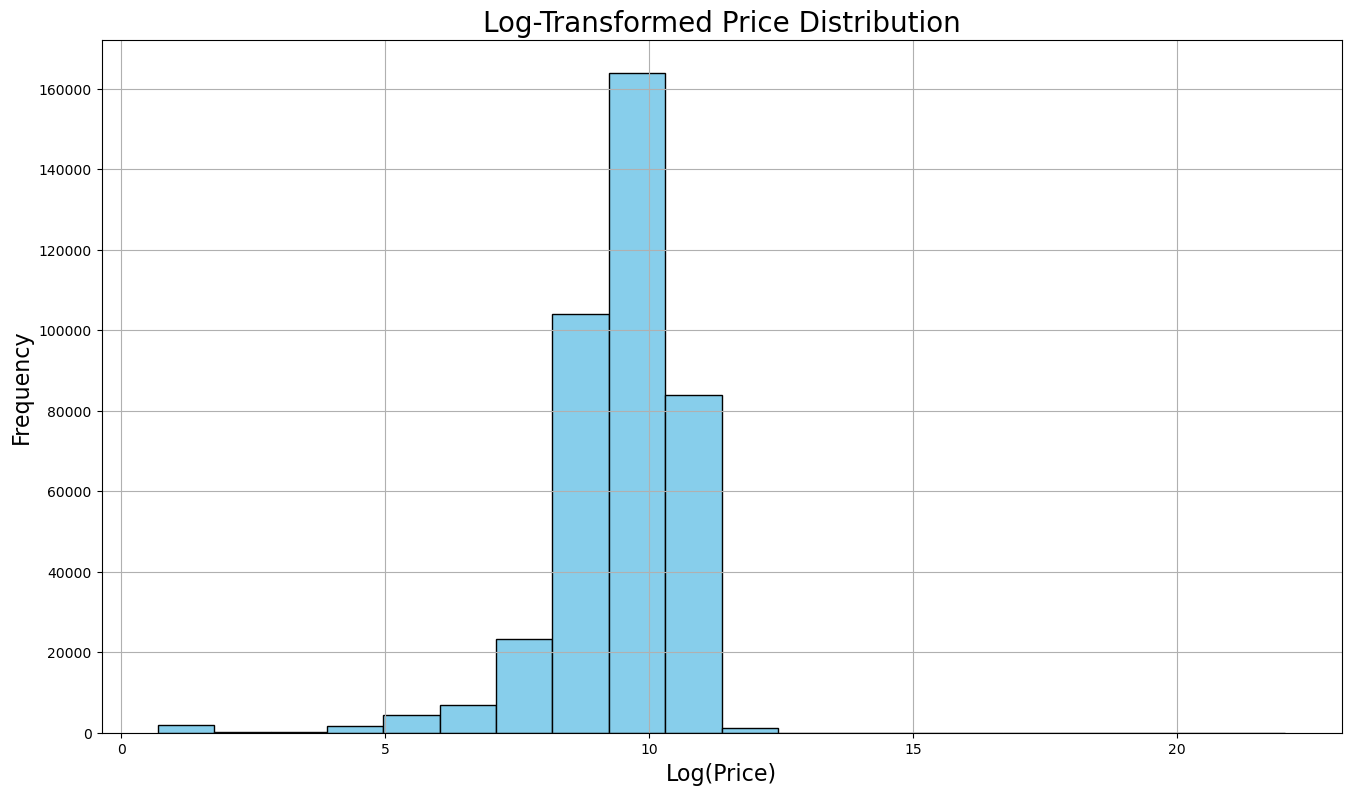

In [91]:
# Apply log transformation to price
df_clean['log_price'] = np.log1p(df_clean['price'])  # log1p handles zero or very small values

# Plot histogram of log-transformed price
plt.figure(figsize=(16, 9))
df_clean['log_price'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Log-Transformed Price Distribution", fontsize=20)
plt.xlabel("Log(Price)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.grid(True)
plt.show()

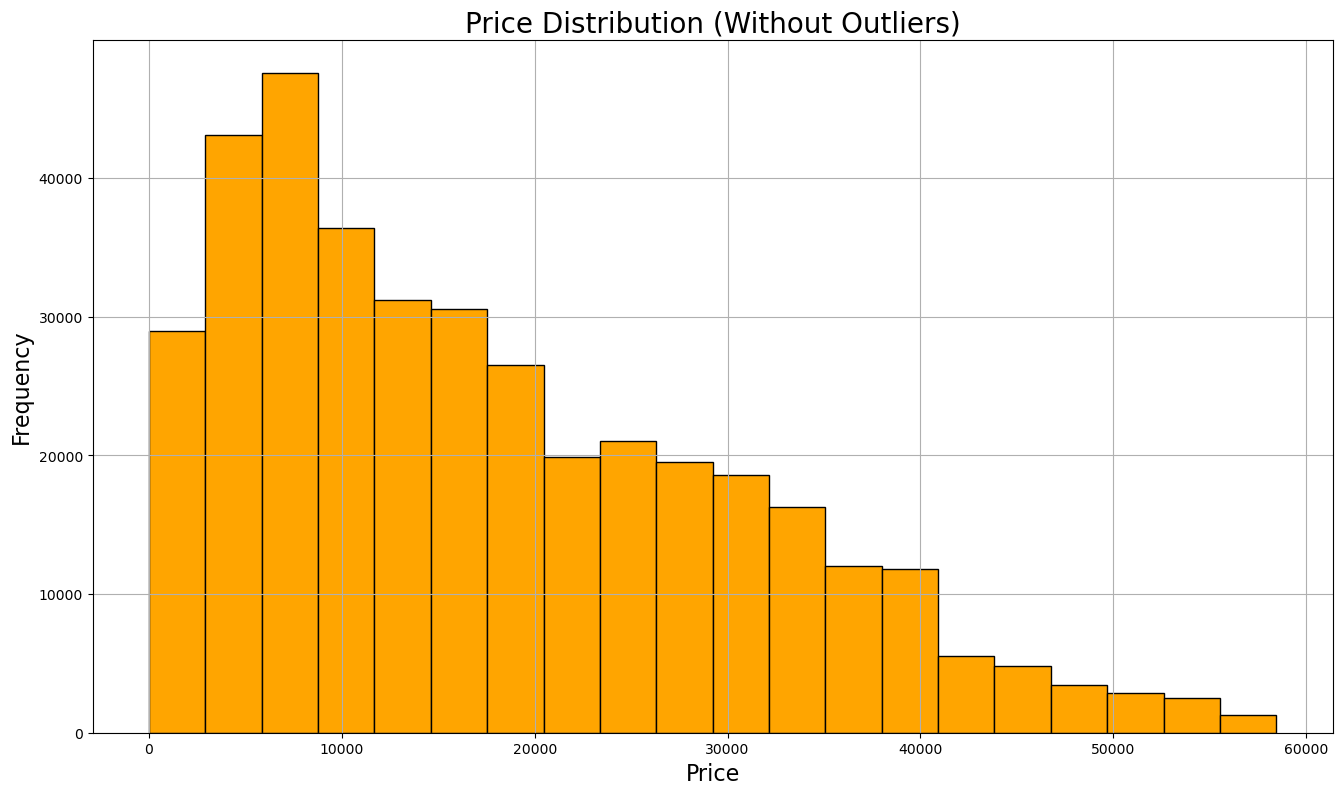

In [92]:
# Calculate Price IQR
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

# Filter the dataframe to remove outliers
df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]
# Reset index after filtering
df_clean.reset_index(drop=True, inplace=True)

# Plot histogram without extreme outliers
plt.figure(figsize=(16, 9))
filtered_data['price'].hist(bins=20, color='orange', edgecolor='black')
plt.title("Price Distribution (Without Outliers)", fontsize=20)
plt.xlabel("Price", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.grid(True)
plt.show()

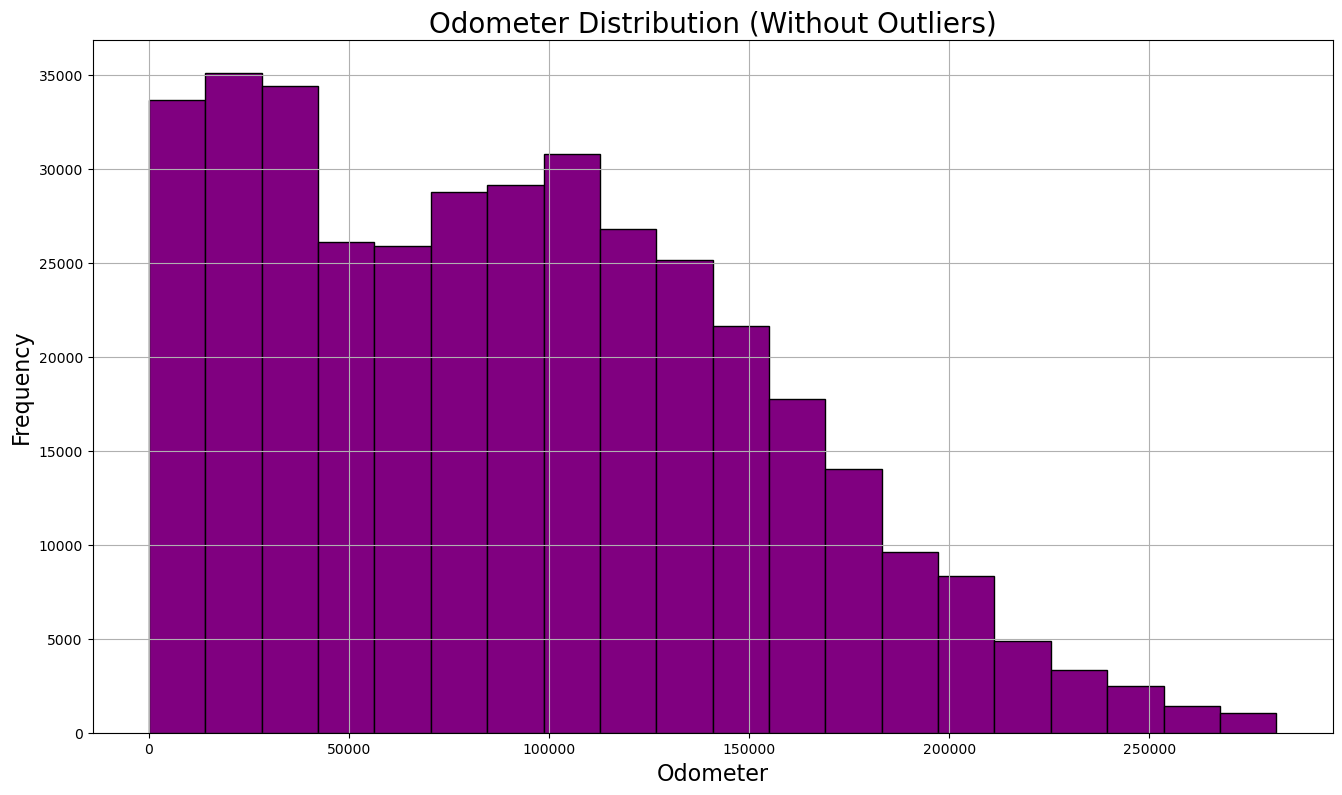

In [93]:
# Calculate odometer IQR
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = df_clean[(df_clean['odometer'] >= lower_bound) & (df_clean['odometer'] <= upper_bound)]

# Filter the dataframe to remove outliers
df_clean = df_clean[(df_clean['odometer'] >= lower_bound) & (df_clean['odometer'] <= upper_bound)]
# Reset index after filtering
df_clean.reset_index(drop=True, inplace=True)

# Plot histogram without extreme outliers
plt.figure(figsize=(16, 9))
filtered_data['odometer'].hist(bins=20, color='purple', edgecolor='black')
plt.title("Odometer Distribution (Without Outliers)", fontsize=20)
plt.xlabel("Odometer", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.grid(True)
plt.show()

<Axes: >

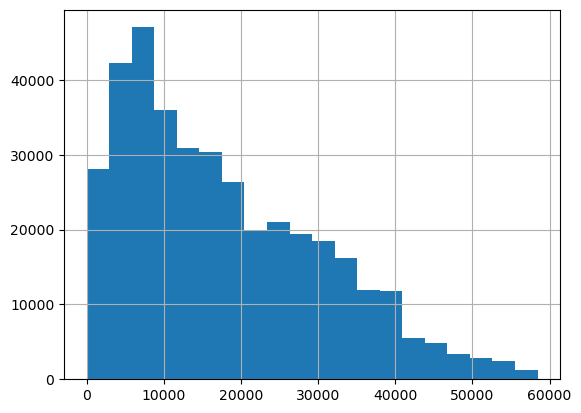

In [94]:
df_clean['price'].hist(bins = 20)

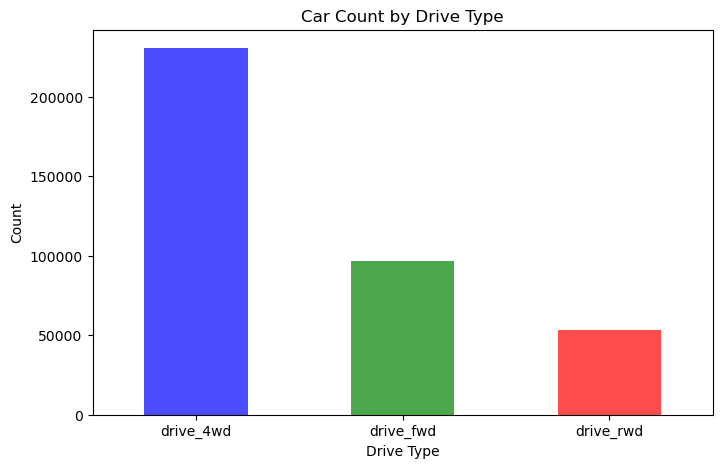

In [95]:
# Sum the values for each drive type to get the count
drive_counts = df_clean[['drive_4wd', 'drive_fwd', 'drive_rwd']].sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
drive_counts.plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)

# Add labels and title
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.title('Car Count by Drive Type')

# Show the plot
plt.xticks(rotation=0)
plt.show()

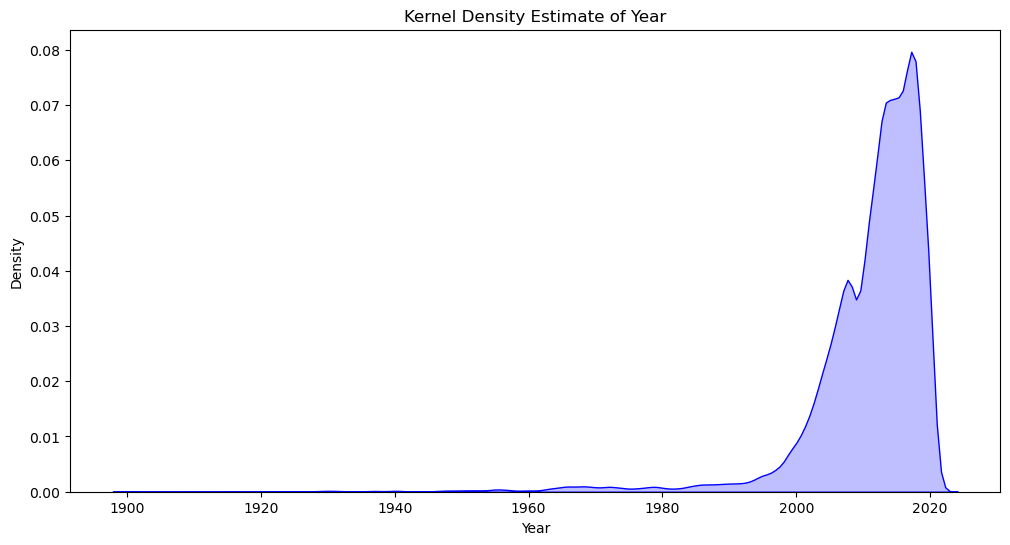

In [96]:
# Create a KDE plot for the 'year' column
plt.figure(figsize=(12, 6))
sns.kdeplot(df_clean['year'], fill=True, color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Year')

# Show the plot
plt.show()

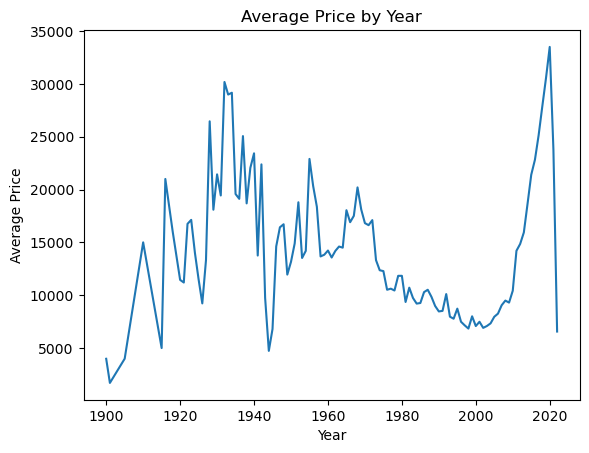

In [97]:
avg_price_by_year = df_clean.groupby('year')['price'].mean()
avg_price_by_year.plot(kind='line', title='Average Price by Year', ylabel='Average Price', xlabel='Year')
plt.show()

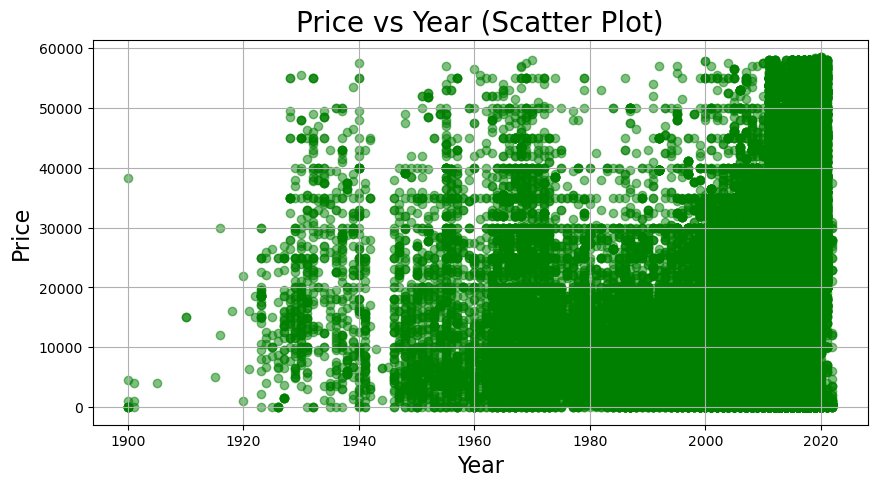

In [98]:
# Scatter plot for price vs year
plt.figure(figsize=(10, 5))
plt.scatter(df_clean['year'], df_clean['price'], alpha=0.5, color='green')
plt.title("Price vs Year (Scatter Plot)", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.grid(True)
plt.show()

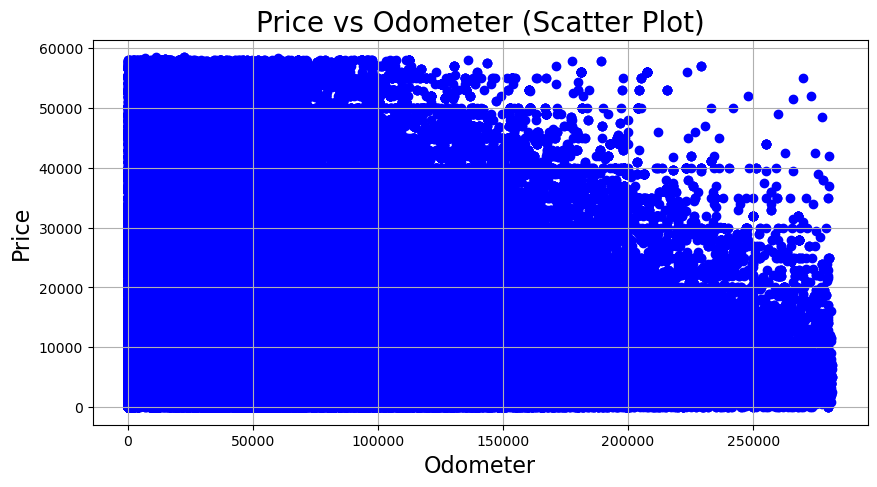

In [99]:
# Scatter plot for price vs odometer
plt.figure(figsize=(10, 5))
plt.scatter(df_clean['odometer'], df_clean['price'], color='blue')
plt.title("Price vs Odometer (Scatter Plot)", fontsize=20)
plt.xlabel("Odometer", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.grid(True)
plt.show()

              price      year  odometer  drive_4wd  drive_fwd  drive_rwd
price      1.000000  0.367222 -0.518148   0.171431  -0.244981   0.065922
year       0.367222  1.000000 -0.304434   0.051935   0.089279  -0.185263
odometer  -0.518148 -0.304434  1.000000   0.049827  -0.014560  -0.051945
drive_4wd  0.171431  0.051935  0.049827   1.000000  -0.724073  -0.500389
drive_fwd -0.244981  0.089279 -0.014560  -0.724073   1.000000  -0.234844
drive_rwd  0.065922 -0.185263 -0.051945  -0.500389  -0.234844   1.000000


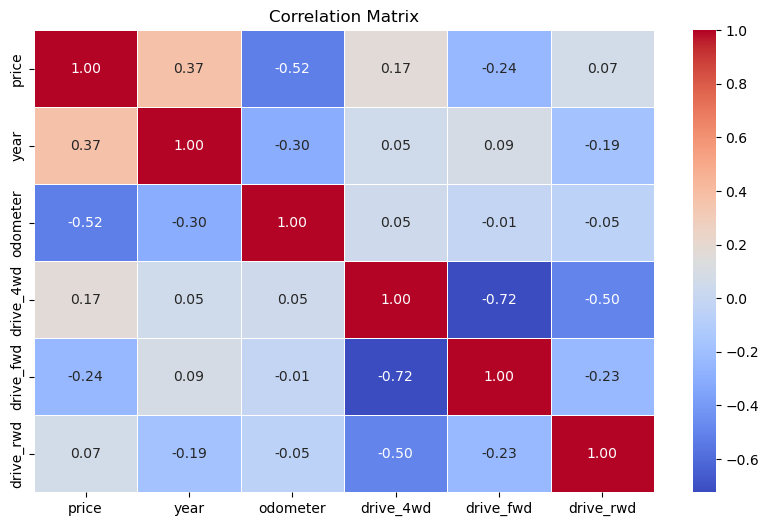

In [100]:
#correlation between price, year, odometer, drive
# Select the relevant columns
correlation_columns = ['price', 'year', 'odometer', 'drive_4wd', 'drive_fwd', 'drive_rwd']
correlation_matrix = df_clean[correlation_columns].corr()
# Display correlation matrix
print(correlation_matrix)

# Plot the heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [101]:
#Add new column age of the car
current_year = 2024
df_clean['car_age'] = current_year - df_clean['year']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [102]:
from sklearn.model_selection import train_test_split

# 'price' is the target variable and the rest are features.
X = df_clean.select_dtypes(include=['int'])  # Features (all columns except 'price')
X = X.drop(['price'], axis=1)
#X = df_clean[['year', 'odometer', 'car_age', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other']]
y = df_clean['price']  # Target (price)

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380253 entries, 0 to 380252
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   year                    380253 non-null  int64
 1   odometer                380253 non-null  int64
 2   condition_Unknown       380253 non-null  int64
 3   condition_excellent     380253 non-null  int64
 4   condition_fair          380253 non-null  int64
 5   condition_good          380253 non-null  int64
 6   condition_likeNew       380253 non-null  int64
 7   condition_new           380253 non-null  int64
 8   condition_salvage       380253 non-null  int64
 9   title_status_Unknown    380253 non-null  int64
 10  title_status_clean      380253 non-null  int64
 11  title_status_lien       380253 non-null  int64
 12  title_status_missing    380253 non-null  int64
 13  title_status_partsOnly  380253 non-null  int64
 14  title_status_rebuilt    380253 non-null  int64
 15  

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler fitted on the training data)
X_test_scaled = scaler.transform(X_test)

# Train the model using the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
# Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print results
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 85255951.90665926
Linear Regression MAE: 6863.081861959469
Linear Regression R2: 0.47827520722089223


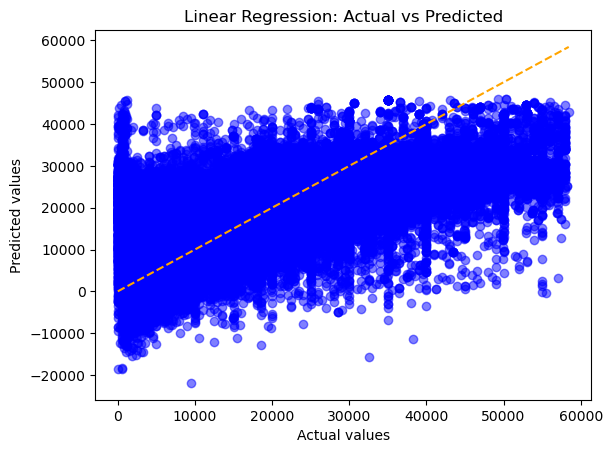

In [104]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

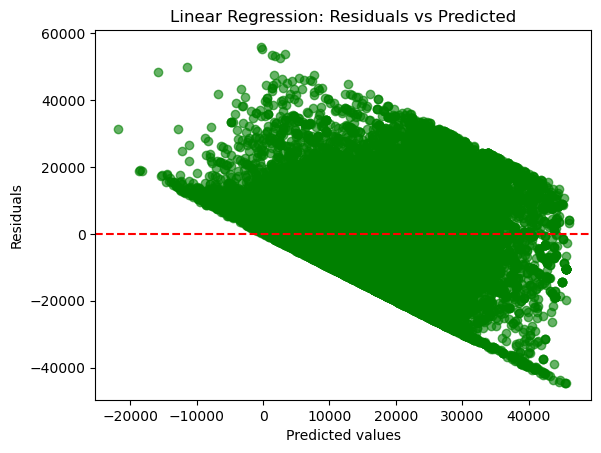

In [105]:
# Calculate residuals
residuals = y_test - y_pred_lr

# Plot residuals
plt.scatter(y_pred_lr, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs Predicted')
plt.show()

In [110]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Initialize the model with regularization
ridge_model = Ridge(alpha=1.0)

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the model using the scaled and polynomial features
ridge_model.fit(X_train_poly, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test_poly)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2: {r2_ridge}")
print(f"Ridge Regression MAE: {mae_ridge}")

Ridge Regression MSE: 72084335.18328655
Ridge Regression R2: 0.5588790694954122
Ridge Regression MAE: 6034.304911538854


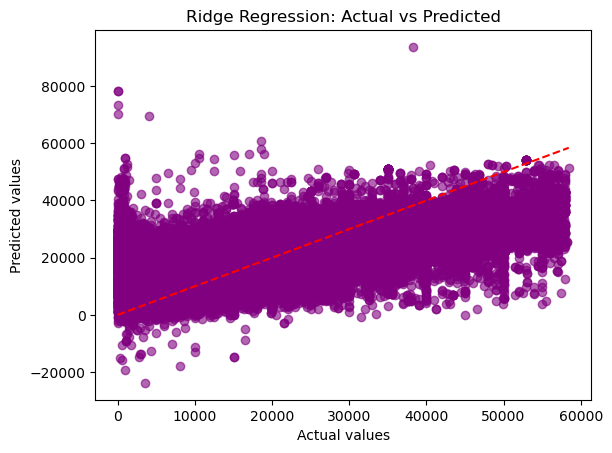

In [111]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred_ridge, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

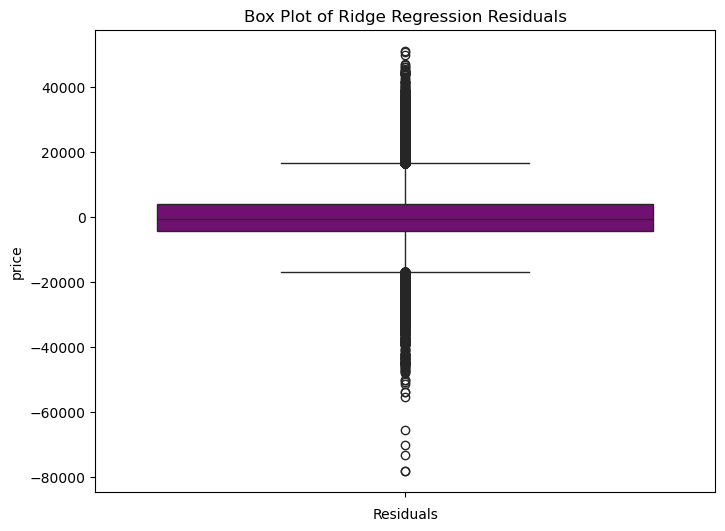

In [112]:
# Calculate residuals (actual - predicted)
residuals_ridge = y_test - y_pred_ridge

# Plot box plot for residuals
plt.figure(figsize=(8, 6))
sns.boxplot(residuals_ridge, color='purple')
plt.title('Box Plot of Ridge Regression Residuals')
plt.xlabel('Residuals')
plt.show()

In [113]:
from sklearn.linear_model import Lasso

# Take a subset of the training data
X_train_sample = X_train[:10000]  
y_train_sample = y_train[:10000]
X_test_sample = X_test[:10000]
y_test_sample = y_test[:10000]

# Initialize the Lasso model
lasso_model = Lasso()

# Set up a range of possible values for the alpha parameter (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0], 'max_iter': [1000000]}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model with cross-validation
grid_search.fit(X_train_sample, y_train_sample)

# Get the best model (best alpha value found by GridSearchCV)
best_lasso_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_lasso = best_lasso_model.predict(X_test_sample)

# Evaluate the model
mse_lasso = mean_squared_error(y_test_sample, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_sample, y_pred_lasso)
r2_lasso = r2_score(y_test_sample, y_pred_lasso)

# Print the results
print(f"Best Lasso Model Alpha: {grid_search.best_params_['alpha']}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression MAE: {mae_lasso}")
print(f"Lasso Regression R2: {r2_lasso}")


Best Lasso Model Alpha: 10.0
Lasso Regression MSE: 86528503.15658325
Lasso Regression MAE: 6932.620552570763
Lasso Regression R2: 0.48655507775277784


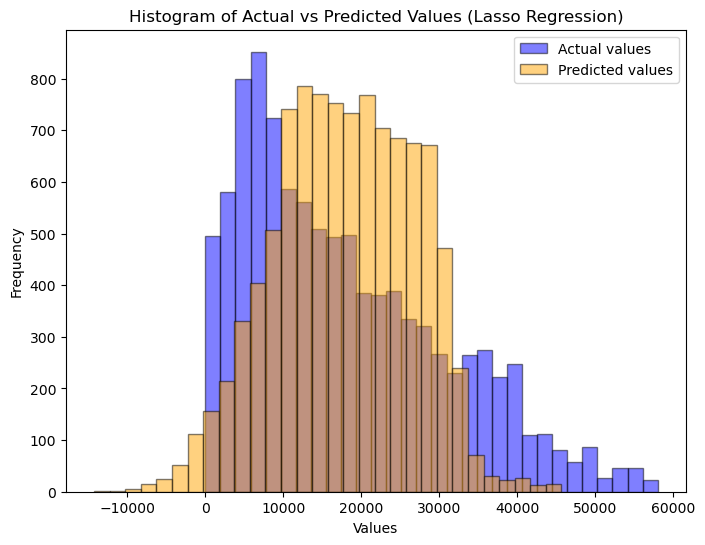

In [114]:
# Plot histogram for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.hist(y_test_sample, bins=30, alpha=0.5, label='Actual values', color='blue', edgecolor='black')
plt.hist(y_pred_lasso, bins=30, alpha=0.5, label='Predicted values', color='orange', edgecolor='black')
plt.title('Histogram of Actual vs Predicted Values (Lasso Regression)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

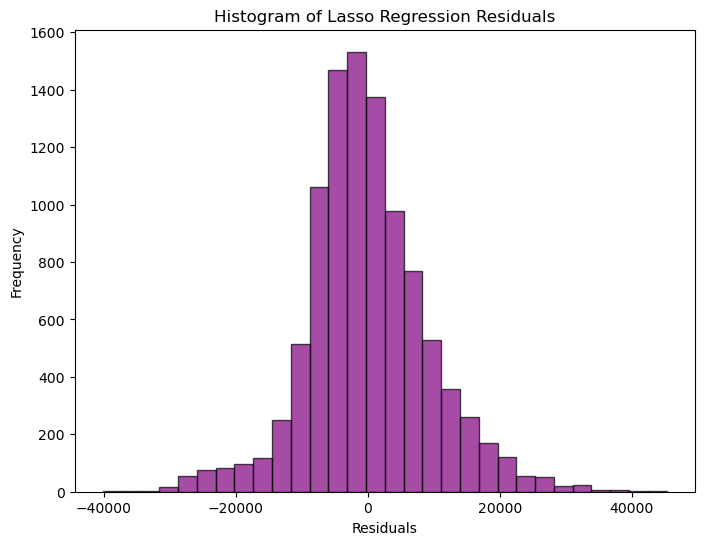

In [115]:
# Calculate residuals (actual - predicted)
residuals_lasso = y_test_sample - y_pred_lasso

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_lasso, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Lasso Regression Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

* The histogram of Lasso regression residuals illustrates the distribution of prediction errors.
* Errors are centered around zero, indicating that the model is generally unbiased.
* The spread of residuals suggests variability in prediction accuracy.
* Potential skewness in the distribution indicates some systematic prediction deviations.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Linear Regression:
* Performance:
* MSE = 85,255,951
* MAE = 6,863
* 𝑅2 = 0.478
The R square value suggests that approximately 48% of the variability in car prices is explained by the model. 
A relatively high MSE indicates large prediction errors, while the MAE shows an average error of $6,863, which may be significant relative to car prices.
The model may underperform if relationships between features and the target are nonlinear or if multicollinearity exists.

Ridge Regression:
Performance:
* MSE = 72,084,335
* MAE = 6,034
* 𝑅2 = 0.559
Ridge regression improves significantly over linear regression, reducing MSE by about 15% and increasing 𝑅2 to 0.559.
Ridge's penalty term likely mitigated multicollinearity, leading to a more robust model. 
Lower MAE suggests better average predictive accuracy, reducing typical errors by $829 compared to linear regression.

Lasso Regression:
Performance:
* Best Alpha = 10.0 (regularization strength)
* MSE = 86,528,503
* MAE = 6,933
* 𝑅2 = 0.487
Lasso achieved a slightly higher 𝑅2 than linear regression, explaining 48.7% of price variability, but it did not outperform ridge. 
Despite feature selection due to its 𝐿1-regularization, the MSE and MAE remain higher than Ridge, suggesting potential underfitting. 
The feature selection benefit of Lasso might not fully offset its regularization in this case.

Comparison:
1. Ridge Regression clearly outperforms the others, offering the best tradeoff between bias and variance.
2. Lasso’s feature reduction capability may not be critical here, as no significant dimensionality or overfitting issue is apparent. 
3. Linear regression serves as a good baseline but struggles with high errors and relatively lower R2.

Recommendations:
* Ridge regression is the most suitable model given its superior predictive performance.
* Explore further hyperparameter tuning for Ridge and Lasso, and consider combining Ridge with feature engineering.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.